# Author

Ronen Huang

# Import Libraries

In [ ]:
import os
from bible_search_engine.components.preprocess import NLPTokenizer
from bible_search_engine.components.indexing import BibleChapterIndex
from bible_search_engine.components.ranker import RandomRanker, TFIDFRanker, BM25Ranker, DirichletLMRanker, BiEncoderRanker, ColbertRanker
from bible_search_engine.components.relevance import Relevance
from bible_search_engine.components.l2r import L2RRanker, L2RFeatureExtractor
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import orjson
import numpy as np
import joblib

In [2]:
train_queries_path = 'bible_search_engine/bible_queries_relevances/train_queries_relevances.csv'
test_queries_path = 'bible_search_engine/bible_queries_relevances/test_queries_relevances.csv'

In [3]:
eval_ranker = Relevance([train_queries_path, test_queries_path])

# Create Bible Chapter Index

In [4]:
nlp_tokenizer = NLPTokenizer()

Device set to use cpu


In [5]:
bible_chapter_index = BibleChapterIndex()
bible_chapter_index.load('bible_search_engine/bible_index_niv')

0it [00:00, ?it/s]

10421it [00:00, 101342.56it/s]
1189it [00:00, 261745.00it/s]
10421it [00:00, 550163.53it/s]
1189it [00:00, 16162.05it/s]

Loaded Bible Index from c:\Users\ronen\Documents\Projects\bible_search_engine\src\bible_search_engine\bible_index_niv


# Evaluate Random Ranker

In [6]:
random_ranker = RandomRanker(bible_chapter_index, nlp_tokenizer)

In [7]:
random_ranker_eval_results = eval_ranker.evaluate_ranker_results(random_ranker)

What is the significance of the covenant God made with Abraham?


100%|██████████| 1189/1189 [00:00<00:00, 144413.39it/s]


0.0

If God is merciful and kind, why do people still suffer in this world?


100%|██████████| 1189/1189 [00:00<00:00, 40168.40it/s]


0.13333333333333333

How do the ten commandments apply today?


100%|██████████| 1189/1189 [00:00<00:00, 97915.41it/s]


0.4666666666666667

Where does God show up in our lives if he is not bounded by this world?


100%|██████████| 1189/1189 [00:00<00:00, 47995.57it/s]


0.6

Who were the kings of Israel and were they faithful to God?


100%|██████████| 1189/1189 [00:00<00:00, 60267.65it/s]


0.5333333333333333

What are the eternal consequences of sin?


100%|██████████| 1189/1189 [00:00<00:00, 58146.23it/s]


0.26666666666666666

Why did Jesus die on the cross?


100%|██████████| 1189/1189 [00:00<00:00, 28838.08it/s]


0.2

How can we be faithful to God?


100%|██████████| 1189/1189 [00:00<00:00, 117482.80it/s]


0.26666666666666666

Where does God lead his people to?


100%|██████████| 1189/1189 [00:00<00:00, 86069.30it/s]


0.5333333333333333

Who are the enemies of God?


100%|██████████| 1189/1189 [00:00<00:00, 132725.49it/s]


0.7333333333333333

What did God do to unloyal servants?


100%|██████████| 1189/1189 [00:00<00:00, 183663.96it/s]


0.06666666666666667

Why should we listen to authority and what are the exceptions?


100%|██████████| 1189/1189 [00:00<00:00, 143784.67it/s]


0.0

How do we get saved and know when we are saved?


100%|██████████| 1189/1189 [00:00<00:00, 63830.68it/s]


0.06666666666666667

Where did Paul travel to spread the good news?


100%|██████████| 1189/1189 [00:00<00:00, 76056.54it/s]


0.06666666666666667

Who does God want us to reach out to?


100%|██████████| 1189/1189 [00:00<00:00, 95646.86it/s]


0.0

What does God say about spirituality?


100%|██████████| 1189/1189 [00:00<00:00, 247384.66it/s]


0.4

Why did Judas betray Jesus?


100%|██████████| 1189/1189 [00:00<00:00, 87124.87it/s]


0.13333333333333333

How do we face discrimination and injustice?


100%|██████████| 1189/1189 [00:00<00:00, 109761.80it/s]


0.3333333333333333

Where do we find comfort and peace?


100%|██████████| 1189/1189 [00:00<00:00, 76011.33it/s]


0.26666666666666666

Who has received prophecies from God?


100%|██████████| 1189/1189 [00:00<00:00, 144025.51it/s]


0.4



In [8]:
random_ranker_eval_results

[('What is the significance of the covenant God made with Abraham?', 0.0),
 ('If God is merciful and kind, why do people still suffer in this world?',
  0.13333333333333333),
 ('How do the ten commandments apply today?', 0.4666666666666667),
 ('Where does God show up in our lives if he is not bounded by this world?',
  0.6),
 ('Who were the kings of Israel and were they faithful to God?',
  0.5333333333333333),
 ('What are the eternal consequences of sin?', 0.26666666666666666),
 ('Why did Jesus die on the cross?', 0.2),
 ('How can we be faithful to God?', 0.26666666666666666),
 ('Where does God lead his people to?', 0.5333333333333333),
 ('Who are the enemies of God?', 0.7333333333333333),
 ('What did God do to unloyal servants?', 0.06666666666666667),
 ('Why should we listen to authority and what are the exceptions?', 0.0),
 ('How do we get saved and know when we are saved?', 0.06666666666666667),
 ('Where did Paul travel to spread the good news?', 0.06666666666666667),
 ('Who does G

# Evaluate TF-IDF Ranker

In [9]:
tf_idf_ranker = TFIDFRanker(bible_chapter_index, nlp_tokenizer)

In [10]:
tf_idf_ranker_eval_results = eval_ranker.evaluate_ranker_results(tf_idf_ranker)

What is the significance of the covenant God made with Abraham?


100%|██████████| 1189/1189 [00:00<00:00, 74009.07it/s]


0.7333333333333333

If God is merciful and kind, why do people still suffer in this world?


100%|██████████| 1189/1189 [00:00<00:00, 14759.67it/s]


0.9333333333333333

How do the ten commandments apply today?


100%|██████████| 1189/1189 [00:00<00:00, 25622.85it/s]


0.6666666666666666

Where does God show up in our lives if he is not bounded by this world?


100%|██████████| 1189/1189 [00:00<00:00, 14559.90it/s]


0.7333333333333333

Who were the kings of Israel and were they faithful to God?


100%|██████████| 1189/1189 [00:00<00:00, 19172.91it/s]


0.6666666666666666

What are the eternal consequences of sin?


100%|██████████| 1189/1189 [00:00<00:00, 39424.39it/s]


0.7333333333333333

Why did Jesus die on the cross?


100%|██████████| 1189/1189 [00:00<00:00, 15165.05it/s]


0.6666666666666666

How can we be faithful to God?


100%|██████████| 1189/1189 [00:00<00:00, 50119.87it/s]


0.6666666666666666

Where does God lead his people to?


100%|██████████| 1189/1189 [00:00<00:00, 20111.66it/s]


0.8

Who are the enemies of God?


100%|██████████| 1189/1189 [00:00<00:00, 38565.85it/s]


1.0

What did God do to unloyal servants?


100%|██████████| 1189/1189 [00:00<00:00, 46370.25it/s]


0.8

Why should we listen to authority and what are the exceptions?


100%|██████████| 1189/1189 [00:00<00:00, 38441.29it/s]


0.6666666666666666

How do we get saved and know when we are saved?


100%|██████████| 1189/1189 [00:00<00:00, 16509.62it/s]


0.4666666666666667

Where did Paul travel to spread the good news?


100%|██████████| 1189/1189 [00:00<00:00, 19821.49it/s]


0.6666666666666666

Who does God want us to reach out to?


100%|██████████| 1189/1189 [00:00<00:00, 19355.75it/s]


0.4

What does God say about spirituality?


100%|██████████| 1189/1189 [00:00<00:00, 54560.87it/s]


0.8

Why did Judas betray Jesus?


100%|██████████| 1189/1189 [00:00<00:00, 18555.69it/s]


0.5333333333333333

How do we face discrimination and injustice?


100%|██████████| 1189/1189 [00:00<00:00, 46772.09it/s]


0.8

Where do we find comfort and peace?


100%|██████████| 1189/1189 [00:00<00:00, 23551.71it/s]


0.5333333333333333

Who has received prophecies from God?


100%|██████████| 1189/1189 [00:00<00:00, 24406.13it/s]


0.9333333333333333



In [11]:
tf_idf_ranker_eval_results

[('What is the significance of the covenant God made with Abraham?',
  0.7333333333333333),
 ('If God is merciful and kind, why do people still suffer in this world?',
  0.9333333333333333),
 ('How do the ten commandments apply today?', 0.6666666666666666),
 ('Where does God show up in our lives if he is not bounded by this world?',
  0.7333333333333333),
 ('Who were the kings of Israel and were they faithful to God?',
  0.6666666666666666),
 ('What are the eternal consequences of sin?', 0.7333333333333333),
 ('Why did Jesus die on the cross?', 0.6666666666666666),
 ('How can we be faithful to God?', 0.6666666666666666),
 ('Where does God lead his people to?', 0.8),
 ('Who are the enemies of God?', 1.0),
 ('What did God do to unloyal servants?', 0.8),
 ('Why should we listen to authority and what are the exceptions?',
  0.6666666666666666),
 ('How do we get saved and know when we are saved?', 0.4666666666666667),
 ('Where did Paul travel to spread the good news?', 0.6666666666666666),


# Evaluate BM25 Ranker

In [12]:
bm25_ranker = BM25Ranker(bible_chapter_index, nlp_tokenizer)

In [13]:
bm25_ranker_eval_results = eval_ranker.evaluate_ranker_results(bm25_ranker)

What is the significance of the covenant God made with Abraham?


100%|██████████| 1189/1189 [00:00<00:00, 49887.74it/s]


0.6

If God is merciful and kind, why do people still suffer in this world?


100%|██████████| 1189/1189 [00:00<00:00, 13080.04it/s]


0.8

How do the ten commandments apply today?


100%|██████████| 1189/1189 [00:00<00:00, 33621.62it/s]


0.6666666666666666

Where does God show up in our lives if he is not bounded by this world?


100%|██████████| 1189/1189 [00:00<00:00, 14883.01it/s]


0.6

Who were the kings of Israel and were they faithful to God?


100%|██████████| 1189/1189 [00:00<00:00, 17143.09it/s]


1.0

What are the eternal consequences of sin?


100%|██████████| 1189/1189 [00:00<00:00, 35359.46it/s]


0.6666666666666666

Why did Jesus die on the cross?


100%|██████████| 1189/1189 [00:00<00:00, 12905.68it/s]


0.6

How can we be faithful to God?


100%|██████████| 1189/1189 [00:00<00:00, 42475.32it/s]


0.26666666666666666

Where does God lead his people to?


100%|██████████| 1189/1189 [00:00<00:00, 18014.83it/s]


0.9333333333333333

Who are the enemies of God?


100%|██████████| 1189/1189 [00:00<00:00, 36396.61it/s]


0.6

What did God do to unloyal servants?


100%|██████████| 1189/1189 [00:00<00:00, 40582.22it/s]


0.4666666666666667

Why should we listen to authority and what are the exceptions?


100%|██████████| 1189/1189 [00:00<00:00, 29709.27it/s]


0.6

How do we get saved and know when we are saved?


100%|██████████| 1189/1189 [00:00<00:00, 12990.26it/s]


0.4666666666666667

Where did Paul travel to spread the good news?


100%|██████████| 1189/1189 [00:00<00:00, 17294.03it/s]


0.6666666666666666

Who does God want us to reach out to?


100%|██████████| 1189/1189 [00:00<00:00, 22385.24it/s]


0.5333333333333333

What does God say about spirituality?


100%|██████████| 1189/1189 [00:00<00:00, 40310.61it/s]


0.8666666666666667

Why did Judas betray Jesus?


100%|██████████| 1189/1189 [00:00<00:00, 20249.42it/s]


0.6666666666666666

How do we face discrimination and injustice?


100%|██████████| 1189/1189 [00:00<00:00, 56319.41it/s]


0.3333333333333333

Where do we find comfort and peace?


100%|██████████| 1189/1189 [00:00<00:00, 29584.66it/s]


0.5333333333333333

Who has received prophecies from God?


100%|██████████| 1189/1189 [00:00<00:00, 33050.75it/s]


1.0



In [14]:
bm25_ranker_eval_results

[('What is the significance of the covenant God made with Abraham?', 0.6),
 ('If God is merciful and kind, why do people still suffer in this world?',
  0.8),
 ('How do the ten commandments apply today?', 0.6666666666666666),
 ('Where does God show up in our lives if he is not bounded by this world?',
  0.6),
 ('Who were the kings of Israel and were they faithful to God?', 1.0),
 ('What are the eternal consequences of sin?', 0.6666666666666666),
 ('Why did Jesus die on the cross?', 0.6),
 ('How can we be faithful to God?', 0.26666666666666666),
 ('Where does God lead his people to?', 0.9333333333333333),
 ('Who are the enemies of God?', 0.6),
 ('What did God do to unloyal servants?', 0.4666666666666667),
 ('Why should we listen to authority and what are the exceptions?', 0.6),
 ('How do we get saved and know when we are saved?', 0.4666666666666667),
 ('Where did Paul travel to spread the good news?', 0.6666666666666666),
 ('Who does God want us to reach out to?', 0.5333333333333333),
 

## Evaluate Dirichlet LM Ranker

In [15]:
dirichlet_lm_ranker = DirichletLMRanker(bible_chapter_index, nlp_tokenizer)

In [16]:
dirichlet_lm_ranker_eval_results = eval_ranker.evaluate_ranker_results(dirichlet_lm_ranker)

What is the significance of the covenant God made with Abraham?


100%|██████████| 1189/1189 [00:00<00:00, 84504.40it/s]


0.4

If God is merciful and kind, why do people still suffer in this world?


100%|██████████| 1189/1189 [00:00<00:00, 18399.67it/s]


0.6666666666666666

How do the ten commandments apply today?


100%|██████████| 1189/1189 [00:00<00:00, 39219.45it/s]


0.5333333333333333

Where does God show up in our lives if he is not bounded by this world?


100%|██████████| 1189/1189 [00:00<00:00, 21782.36it/s]


0.6666666666666666

Who were the kings of Israel and were they faithful to God?


100%|██████████| 1189/1189 [00:00<00:00, 28300.65it/s]


0.8

What are the eternal consequences of sin?


100%|██████████| 1189/1189 [00:00<00:00, 58460.45it/s]


0.4666666666666667

Why did Jesus die on the cross?


100%|██████████| 1189/1189 [00:00<00:00, 18204.22it/s]


0.26666666666666666

How can we be faithful to God?


100%|██████████| 1189/1189 [00:00<00:00, 75082.09it/s]


0.4

Where does God lead his people to?


100%|██████████| 1189/1189 [00:00<00:00, 26423.58it/s]


0.8

Who are the enemies of God?


100%|██████████| 1189/1189 [00:00<00:00, 61973.75it/s]


0.8

What did God do to unloyal servants?


100%|██████████| 1189/1189 [00:00<00:00, 66270.15it/s]


0.6

Why should we listen to authority and what are the exceptions?


100%|██████████| 1189/1189 [00:00<00:00, 49367.71it/s]


0.5333333333333333

How do we get saved and know when we are saved?


100%|██████████| 1189/1189 [00:00<00:00, 20351.14it/s]


0.13333333333333333

Where did Paul travel to spread the good news?


100%|██████████| 1189/1189 [00:00<00:00, 17613.23it/s]


0.2

Who does God want us to reach out to?


100%|██████████| 1189/1189 [00:00<00:00, 19154.50it/s]


0.4

What does God say about spirituality?


100%|██████████| 1189/1189 [00:00<00:00, 31173.60it/s]


0.6666666666666666

Why did Judas betray Jesus?


100%|██████████| 1189/1189 [00:00<00:00, 18162.19it/s]


0.4666666666666667

How do we face discrimination and injustice?


100%|██████████| 1189/1189 [00:00<00:00, 37507.45it/s]


0.3333333333333333

Where do we find comfort and peace?


100%|██████████| 1189/1189 [00:00<00:00, 21815.52it/s]


0.4

Who has received prophecies from God?


100%|██████████| 1189/1189 [00:00<00:00, 17247.74it/s]


0.6666666666666666



In [17]:
dirichlet_lm_ranker_eval_results

[('What is the significance of the covenant God made with Abraham?', 0.4),
 ('If God is merciful and kind, why do people still suffer in this world?',
  0.6666666666666666),
 ('How do the ten commandments apply today?', 0.5333333333333333),
 ('Where does God show up in our lives if he is not bounded by this world?',
  0.6666666666666666),
 ('Who were the kings of Israel and were they faithful to God?', 0.8),
 ('What are the eternal consequences of sin?', 0.4666666666666667),
 ('Why did Jesus die on the cross?', 0.26666666666666666),
 ('How can we be faithful to God?', 0.4),
 ('Where does God lead his people to?', 0.8),
 ('Who are the enemies of God?', 0.8),
 ('What did God do to unloyal servants?', 0.6),
 ('Why should we listen to authority and what are the exceptions?',
  0.5333333333333333),
 ('How do we get saved and know when we are saved?', 0.13333333333333333),
 ('Where did Paul travel to spread the good news?', 0.2),
 ('Who does God want us to reach out to?', 0.4),
 ('What does 

# Evaluate Colbert Ranker

In [18]:
colbert_ranker = ColbertRanker("colbert-ir/colbertv2.0", "bible_chapters")

In [19]:
colbert_ranker_eval_results = eval_ranker.evaluate_ranker_results(colbert_ranker)

What is the significance of the covenant God made with Abraham?
0.6666666666666666

If God is merciful and kind, why do people still suffer in this world?
0.6

How do the ten commandments apply today?
0.8666666666666667

Where does God show up in our lives if he is not bounded by this world?
0.8666666666666667

Who were the kings of Israel and were they faithful to God?
0.7333333333333333

What are the eternal consequences of sin?
0.4666666666666667

Why did Jesus die on the cross?
0.4

How can we be faithful to God?
0.5333333333333333

Where does God lead his people to?
0.8

Who are the enemies of God?
0.6666666666666666

What did God do to unloyal servants?
0.3333333333333333

Why should we listen to authority and what are the exceptions?
0.4666666666666667

How do we get saved and know when we are saved?
0.3333333333333333

Where did Paul travel to spread the good news?
0.7333333333333333

Who does God want us to reach out to?
0.26666666666666666

What does God say about spiritualit

In [20]:
colbert_ranker_eval_results

[('What is the significance of the covenant God made with Abraham?',
  0.6666666666666666),
 ('If God is merciful and kind, why do people still suffer in this world?',
  0.6),
 ('How do the ten commandments apply today?', 0.8666666666666667),
 ('Where does God show up in our lives if he is not bounded by this world?',
  0.8666666666666667),
 ('Who were the kings of Israel and were they faithful to God?',
  0.7333333333333333),
 ('What are the eternal consequences of sin?', 0.4666666666666667),
 ('Why did Jesus die on the cross?', 0.4),
 ('How can we be faithful to God?', 0.5333333333333333),
 ('Where does God lead his people to?', 0.8),
 ('Who are the enemies of God?', 0.6666666666666666),
 ('What did God do to unloyal servants?', 0.3333333333333333),
 ('Why should we listen to authority and what are the exceptions?',
  0.4666666666666667),
 ('How do we get saved and know when we are saved?', 0.3333333333333333),
 ('Where did Paul travel to spread the good news?', 0.7333333333333333),


# Evalute Bi-Encoder Ranker

In [21]:
encoded_chapters = np.load("bible_search_engine/bible_data/encoded_chapters_niv.npy")
with open("bible_search_engine/bible_data/chapterids_niv.json", "rb") as chapter_ids_file:
    chapter_ids = orjson.loads(chapter_ids_file.readline())
bi_encoder_ranker = BiEncoderRanker(
    'msmarco-distilbert-dot-v5', encoded_chapters, chapter_ids
)

In [22]:
bi_encoder_ranker_eval_results = eval_ranker.evaluate_ranker_results(bi_encoder_ranker)

What is the significance of the covenant God made with Abraham?
0.5333333333333333

If God is merciful and kind, why do people still suffer in this world?
0.7333333333333333

How do the ten commandments apply today?
0.4666666666666667

Where does God show up in our lives if he is not bounded by this world?
0.7333333333333333

Who were the kings of Israel and were they faithful to God?
0.6666666666666666

What are the eternal consequences of sin?
0.13333333333333333

Why did Jesus die on the cross?
0.5333333333333333

How can we be faithful to God?
0.8

Where does God lead his people to?
0.7333333333333333

Who are the enemies of God?
0.8

What did God do to unloyal servants?
0.2

Why should we listen to authority and what are the exceptions?
0.5333333333333333

How do we get saved and know when we are saved?
0.3333333333333333

Where did Paul travel to spread the good news?
0.6666666666666666

Who does God want us to reach out to?
0.3333333333333333

What does God say about spiritualit

In [23]:
bi_encoder_ranker_eval_results

[('What is the significance of the covenant God made with Abraham?',
  0.5333333333333333),
 ('If God is merciful and kind, why do people still suffer in this world?',
  0.7333333333333333),
 ('How do the ten commandments apply today?', 0.4666666666666667),
 ('Where does God show up in our lives if he is not bounded by this world?',
  0.7333333333333333),
 ('Who were the kings of Israel and were they faithful to God?',
  0.6666666666666666),
 ('What are the eternal consequences of sin?', 0.13333333333333333),
 ('Why did Jesus die on the cross?', 0.5333333333333333),
 ('How can we be faithful to God?', 0.8),
 ('Where does God lead his people to?', 0.7333333333333333),
 ('Who are the enemies of God?', 0.8),
 ('What did God do to unloyal servants?', 0.2),
 ('Why should we listen to authority and what are the exceptions?',
  0.5333333333333333),
 ('How do we get saved and know when we are saved?', 0.3333333333333333),
 ('Where did Paul travel to spread the good news?', 0.6666666666666666),

# Evaluate L2R Ranker

In [24]:
chapter_ids = []
chapter_texts = []
with open("bible_search_engine/bible_data/old_testament_niv.jsonl") as old_testament_file:
    for bible_chapter_line in tqdm(old_testament_file):
        bible_chapter = orjson.loads(bible_chapter_line)
        chapter_ids.append(bible_chapter["chapterid"])
        chapter_texts.append(" ".join(bible_chapter["verses"].values()))
with open("bible_search_engine/bible_data/new_testament_niv.jsonl") as new_testament_file:
    for bible_chapter_line in tqdm(new_testament_file):
        bible_chapter = orjson.loads(bible_chapter_line)
        chapter_ids.append(bible_chapter["chapterid"])
        chapter_texts.append(" ".join(bible_chapter["verses"].values()))

929it [00:00, 14555.18it/s]
260it [00:00, 12733.91it/s]


In [25]:
colbert_ranker = ColbertRanker("colbert-ir/colbertv2.0", "bible_chapters")

In [26]:
l2r_feature_extractor = L2RFeatureExtractor(bible_chapter_index, nlp_tokenizer, tf_idf_ranker, bm25_ranker, dirichlet_lm_ranker, bi_encoder_ranker)

In [27]:
l2r_ranker = L2RRanker(bible_chapter_index, nlp_tokenizer, colbert_ranker, l2r_feature_extractor)
l2r_ranker.lightgbm_ranker = joblib.load("bible_search_engine/initial_ranker_niv.pkl")

In [28]:
with open("bible_search_engine/initial_params_niv.json", "rb") as hp_file:
    hp_dict = orjson.loads(hp_file.read())
l2r_ranker.feature_extractor.bm25_ranker.set_params(hp_dict["b"], hp_dict["k1"], hp_dict["k3"])
l2r_ranker.feature_extractor.dirichlet_lm_ranker.set_params(hp_dict["mu"])

In [29]:
l2r_ranker_eval_results = eval_ranker.evaluate_ranker_results(l2r_ranker)

What is the significance of the covenant God made with Abraham?


100%|██████████| 200/200 [00:00<00:00, 2025.62it/s]
C:\Users\ronen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRanker was fitted with feature names
  warnings.warn(


0.9333333333333333

If God is merciful and kind, why do people still suffer in this world?


100%|██████████| 200/200 [00:00<00:00, 1319.26it/s]
C:\Users\ronen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRanker was fitted with feature names
  warnings.warn(


1.0

How do the ten commandments apply today?


100%|██████████| 200/200 [00:00<00:00, 2015.53it/s]
C:\Users\ronen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRanker was fitted with feature names
  warnings.warn(


0.8666666666666667

Where does God show up in our lives if he is not bounded by this world?


100%|██████████| 200/200 [00:00<00:00, 1720.27it/s]
C:\Users\ronen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRanker was fitted with feature names
  warnings.warn(


1.0

Who were the kings of Israel and were they faithful to God?


100%|██████████| 200/200 [00:00<00:00, 1750.18it/s]
C:\Users\ronen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRanker was fitted with feature names
  warnings.warn(


0.8666666666666667

What are the eternal consequences of sin?


100%|██████████| 200/200 [00:00<00:00, 2020.11it/s]
C:\Users\ronen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRanker was fitted with feature names
  warnings.warn(


0.5333333333333333

Why did Jesus die on the cross?


100%|██████████| 200/200 [00:00<00:00, 1551.77it/s]
C:\Users\ronen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRanker was fitted with feature names
  warnings.warn(


0.9333333333333333

How can we be faithful to God?


100%|██████████| 200/200 [00:00<00:00, 2463.67it/s]
C:\Users\ronen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRanker was fitted with feature names
  warnings.warn(


1.0

Where does God lead his people to?


100%|██████████| 200/200 [00:00<00:00, 1881.44it/s]
C:\Users\ronen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRanker was fitted with feature names
  warnings.warn(


0.8666666666666667

Who are the enemies of God?


100%|██████████| 200/200 [00:00<00:00, 2201.03it/s]
C:\Users\ronen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRanker was fitted with feature names
  warnings.warn(


1.0

What did God do to unloyal servants?


100%|██████████| 200/200 [00:00<00:00, 2039.09it/s]
C:\Users\ronen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRanker was fitted with feature names
  warnings.warn(


0.6

Why should we listen to authority and what are the exceptions?


100%|██████████| 200/200 [00:00<00:00, 1875.12it/s]
C:\Users\ronen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRanker was fitted with feature names
  warnings.warn(


0.7333333333333333

How do we get saved and know when we are saved?


100%|██████████| 200/200 [00:00<00:00, 1716.24it/s]
C:\Users\ronen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRanker was fitted with feature names
  warnings.warn(


0.4666666666666667

Where did Paul travel to spread the good news?


100%|██████████| 200/200 [00:00<00:00, 1801.80it/s]
C:\Users\ronen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRanker was fitted with feature names
  warnings.warn(


0.9333333333333333

Who does God want us to reach out to?


100%|██████████| 200/200 [00:00<00:00, 2085.77it/s]
C:\Users\ronen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRanker was fitted with feature names
  warnings.warn(


0.6

What does God say about spirituality?


100%|██████████| 200/200 [00:00<00:00, 2362.04it/s]
C:\Users\ronen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRanker was fitted with feature names
  warnings.warn(


0.9333333333333333

Why did Judas betray Jesus?


100%|██████████| 200/200 [00:00<00:00, 1970.79it/s]
C:\Users\ronen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRanker was fitted with feature names
  warnings.warn(


0.8

How do we face discrimination and injustice?


100%|██████████| 200/200 [00:00<00:00, 2559.29it/s]
C:\Users\ronen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRanker was fitted with feature names
  warnings.warn(


0.6

Where do we find comfort and peace?


100%|██████████| 200/200 [00:00<00:00, 4401.85it/s]
C:\Users\ronen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRanker was fitted with feature names
  warnings.warn(


0.7333333333333333

Who has received prophecies from God?


100%|██████████| 200/200 [00:00<00:00, 2354.49it/s]
C:\Users\ronen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRanker was fitted with feature names
  warnings.warn(


0.9333333333333333



In [30]:
l2r_ranker_eval_results

[('What is the significance of the covenant God made with Abraham?',
  0.9333333333333333),
 ('If God is merciful and kind, why do people still suffer in this world?',
  1.0),
 ('How do the ten commandments apply today?', 0.8666666666666667),
 ('Where does God show up in our lives if he is not bounded by this world?',
  1.0),
 ('Who were the kings of Israel and were they faithful to God?',
  0.8666666666666667),
 ('What are the eternal consequences of sin?', 0.5333333333333333),
 ('Why did Jesus die on the cross?', 0.9333333333333333),
 ('How can we be faithful to God?', 1.0),
 ('Where does God lead his people to?', 0.8666666666666667),
 ('Who are the enemies of God?', 1.0),
 ('What did God do to unloyal servants?', 0.6),
 ('Why should we listen to authority and what are the exceptions?',
  0.7333333333333333),
 ('How do we get saved and know when we are saved?', 0.4666666666666667),
 ('Where did Paul travel to spread the good news?', 0.9333333333333333),
 ('Who does God want us to rea

# Plot Ranker Results

In [33]:
rankers = ['Random'] * len(random_ranker_eval_results) + ['TF-IDF'] * len(tf_idf_ranker_eval_results) +\
    ['BM25'] * len(bm25_ranker_eval_results) + ['Dirichlet LM'] * len(dirichlet_lm_ranker_eval_results) +\
    ['Colbert'] * len(colbert_ranker_eval_results) + ['Bi-Encoder'] * len(bi_encoder_ranker_eval_results) +\
    ['L2R'] * len(l2r_ranker_eval_results)
ranker_types = ['Baseline'] * (len(random_ranker_eval_results) * 6) + ['Bible Search Engine'] * (len(l2r_ranker_eval_results))
precisions = [precision for _, precision in random_ranker_eval_results] + [precision for _, precision in tf_idf_ranker_eval_results] +\
    [precision for _, precision in bm25_ranker_eval_results] + [precision for _, precision in dirichlet_lm_ranker_eval_results] +\
    [precision for _, precision in colbert_ranker_eval_results] + [precision for _, precision in bi_encoder_ranker_eval_results] +\
    [precision for _, precision in l2r_ranker_eval_results]
queries = [query for query, _ in random_ranker_eval_results] * 7

if not os.path.isdir('rankers'):
    os.mkdir('rankers')
rankers_results = pd.DataFrame({'Ranker': rankers, 'Ranker Type': ranker_types, 'Precision at 15': precisions, 'Query': queries})
rankers_results.to_csv('rankers/results.csv', index=None)
rankers_results

,Ranker,Ranker Type,Precision at 15,Query
0,Random,Baseline,0.000000,What is the significance of the covenant God m...
1,Random,Baseline,0.133333,"If God is merciful and kind, why do people sti..."
2,Random,Baseline,0.466667,How do the ten commandments apply today?
3,Random,Baseline,0.600000,Where does God show up in our lives if he is n...
4,Random,Baseline,0.533333,Who were the kings of Israel and were they fai...
...,...,...,...,...
135,L2R,Bible Search Engine,0.933333,What does God say about spirituality?
136,L2R,Bible Search Engine,0.800000,Why did Judas betray Jesus?
137,L2R,Bible Search Engine,0.600000,How do we face discrimination and injustice?
138,L2R,Bible Search Engine,0.733333,Where do we find comfort and peace?


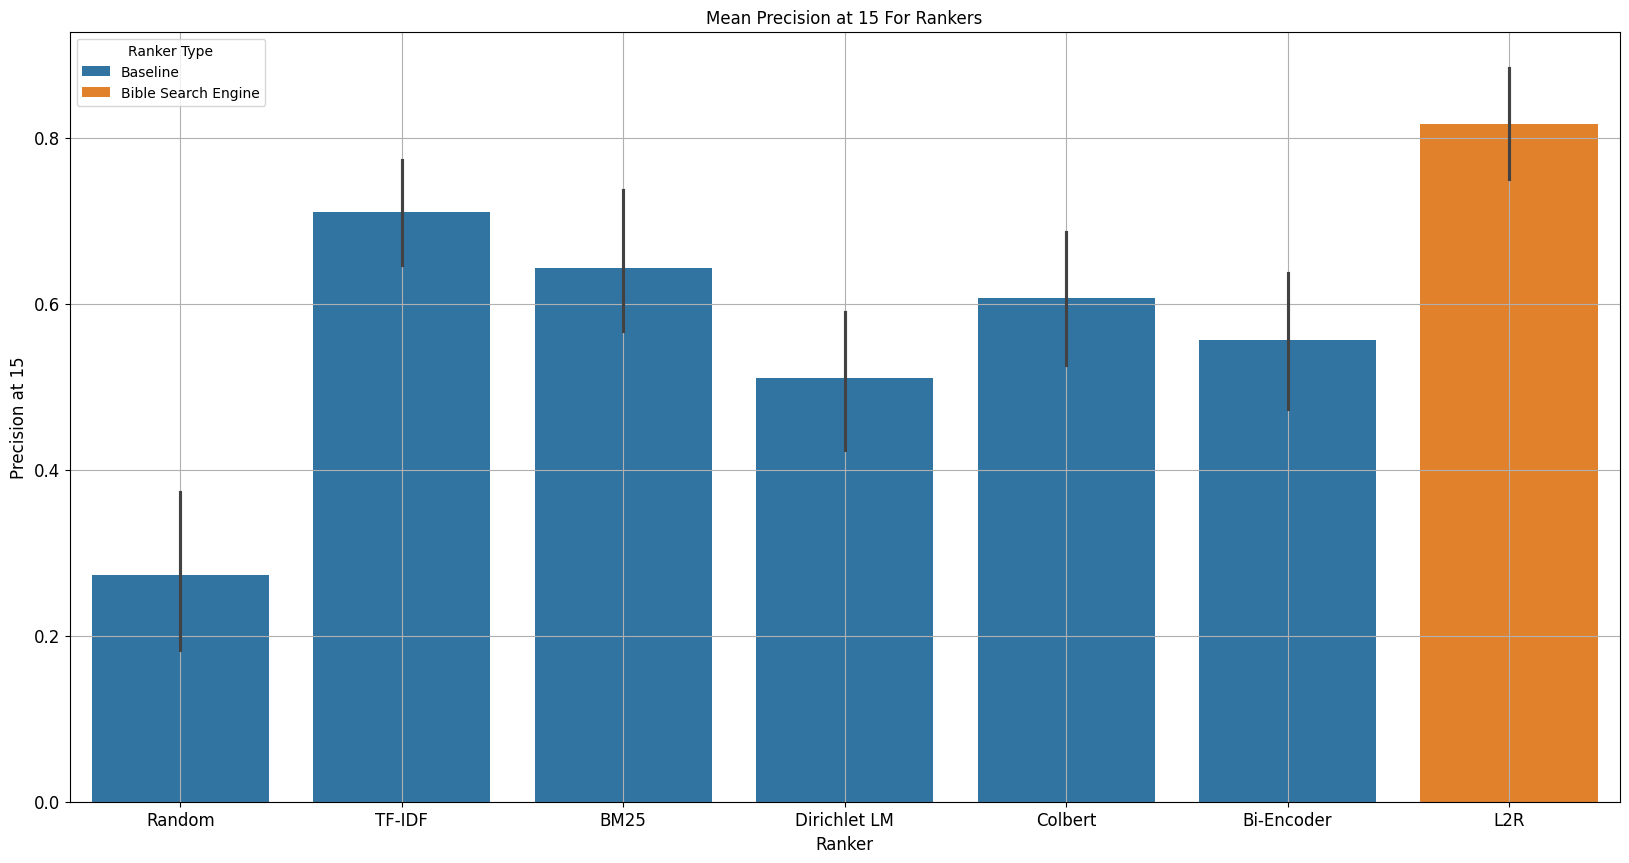

In [34]:
fig, ax = plt.subplots(figsize=(20, 10))
ranker_results_plot = sns.barplot(rankers_results, x='Ranker', y='Precision at 15', hue='Ranker Type')
plt.title('Mean Precision at 15 For Rankers', fontsize='large')
sns.move_legend(ranker_results_plot, 'upper left')
plt.xlabel('Ranker', fontsize='large')
plt.ylabel('Precision at 15', fontsize='large')
plt.xticks(fontsize='large')
plt.yticks(fontsize='large')
ax.grid()
plt.savefig('rankers/results.jpg', dpi=500, bbox_inches='tight')
plt.show()